# Visualizing Loss Function Optimization with the Chain Rule

This notebook visually demonstrates the concepts from the StatQuest video on the Chain Rule, specifically from the **11:30** mark onwards. We'll explore how to find the optimal **intercept** for a simple line to minimize the **squared residual** (our loss function) for a single data point.

### The Goal 🎯

Given a single data point and a line with a fixed slope, we want to find the `intercept` that makes the line fit the point as closely as possible. We measure "closeness" using the **squared residual**.

1.  **Model:** `predicted_height = intercept + 1 * weight`
2.  **Loss Function:** `squared_residual = (observed_height - predicted_height)^2`

We will find the minimum of this loss function by finding where its derivative with respect to the intercept is equal to zero.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a professional and clean style for plots
plt.style.use('seaborn-v0_8-whitegrid')

---

## 1. The Data and The Model

First, let's define our single observed data point, as shown in the video. We have a person's weight and height.

In [2]:
# The single data point from the video
observed_weight = 3
observed_height = 4

# Our model is a line with a fixed slope of 1
# predicted_height = intercept + 1 * weight
def predict_height(intercept, weight):
    return intercept + 1 * weight

Let's visualize how different intercepts affect the line's fit to our data point.

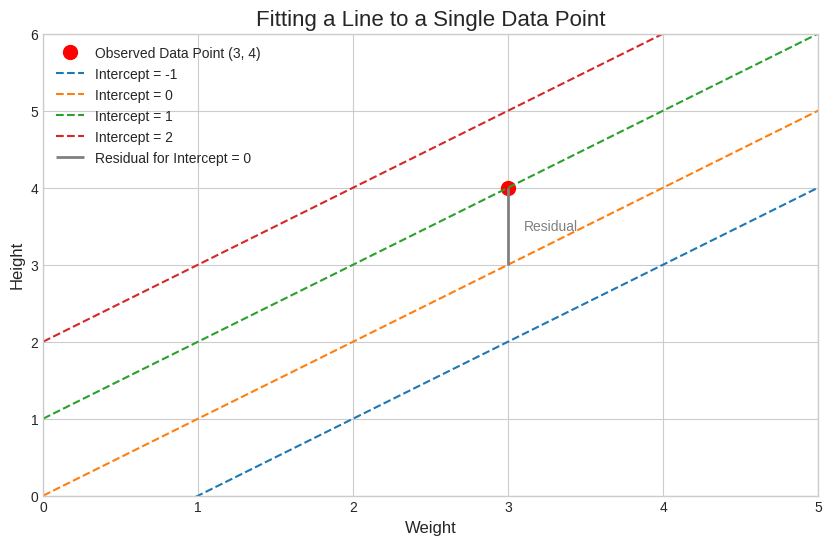

In [3]:
plt.figure(figsize=(10, 6))

# Plot the observed data point
plt.plot(observed_weight, observed_height, 'ro', markersize=10, label='Observed Data Point (3, 4)')

# Define a range of weights for plotting the lines
weights = np.linspace(0, 5, 100)

# Plot lines with different intercepts
for intercept_val in [-1, 0, 1, 2]:
    heights = predict_height(intercept_val, weights)
    plt.plot(weights, heights, '--', label=f'Intercept = {intercept_val}')

# Show the residual for the intercept = 0 case
predicted_for_intercept_0 = predict_height(0, observed_weight)
plt.vlines(observed_weight, ymin=predicted_for_intercept_0, ymax=observed_height,
           colors='gray', linestyles='solid', lw=2, label='Residual for Intercept = 0')
plt.text(3.1, 3.5, 'Residual',
         verticalalignment='center', color='gray')

plt.title('Fitting a Line to a Single Data Point', fontsize=16)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Height', fontsize=12)
plt.legend(fontsize=10)
plt.xlim(0, 5)
plt.ylim(0, 6)
plt.grid(True)
plt.show()

---

## 2. Visualizing The Loss Function

The **loss function** tells us how "bad" our model is for a given intercept. We are using the **squared residual**. Let's calculate and plot the squared residual for a wide range of possible intercepts. The resulting curve is our "loss curve".

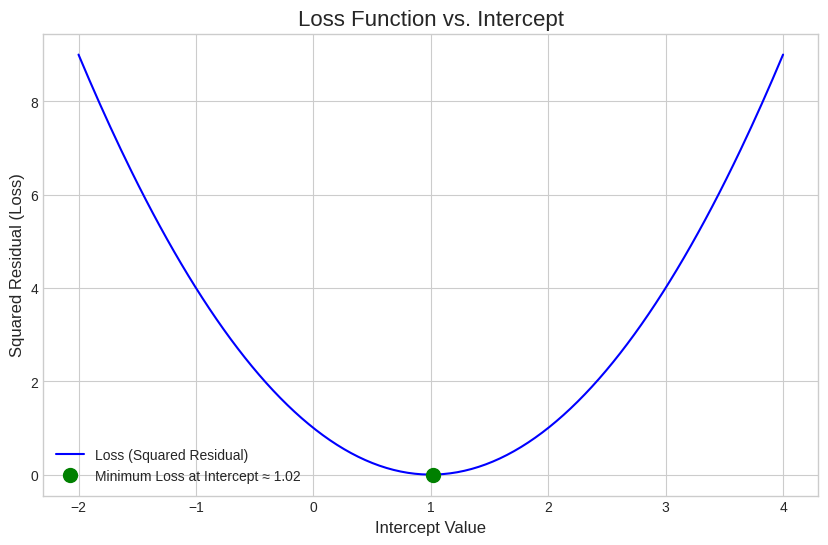

In [4]:
# Create a range of possible intercept values to test
intercepts = np.linspace(-2, 4, 200)

# Calculate the squared residual for each intercept
predicted_heights = predict_height(intercepts, observed_weight)
residuals = observed_height - predicted_heights
squared_residuals = residuals**2 # This is our loss

# Find the intercept that gives the minimum loss from our samples
min_loss_intercept = intercepts[np.argmin(squared_residuals)]
min_loss_value = np.min(squared_residuals)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(intercepts, squared_residuals, 'b-', label='Loss (Squared Residual)')
plt.plot(min_loss_intercept, min_loss_value, 'go', markersize=10, label=f'Minimum Loss at Intercept ≈ {min_loss_intercept:.2f}')

plt.title('Loss Function vs. Intercept', fontsize=16)
plt.xlabel('Intercept Value', fontsize=12)
plt.ylabel('Squared Residual (Loss)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

Visually, we can see the loss is minimized when the **intercept is 1.0**. Now, let's prove this with calculus.

---

## 3. Finding the Minimum with Calculus

As explained in the video, we can use the **chain rule** to find the derivative of the squared residual with respect to the intercept.

Let $L$ be the loss (squared residual) and $b$ be the intercept.

$$ L = (y_{obs} - y_{pred})^2 = (y_{obs} - (b + w_{obs}))^2 $$

The derivative, $\frac{dL}{db}$, tells us the slope of the loss curve. The minimum of the curve is where the slope is zero. Using the chain rule, the derivative is:

$$ \frac{dL}{db} = 2 \cdot (y_{obs} - (b + w_{obs})) \cdot (-1) = -2(y_{obs} - b - w_{obs}) $$

Let's plot this derivative and see where it crosses zero.

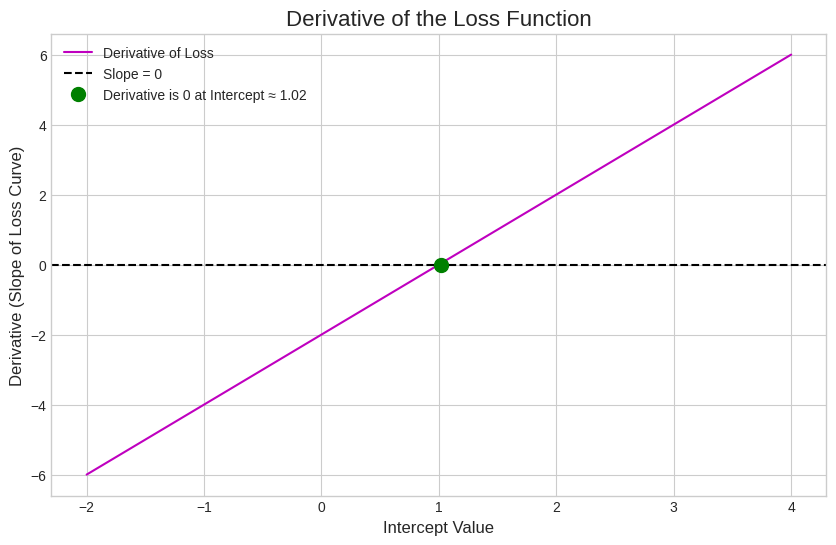

In [5]:
# Define the derivative function
def derivative_loss(intercept, obs_h, obs_w):
    return -2 * (obs_h - intercept - obs_w)

# Calculate the derivative for our range of intercepts
derivatives = derivative_loss(intercepts, observed_height, observed_weight)

# Plot the derivative
plt.figure(figsize=(10, 6))
plt.plot(intercepts, derivatives, 'm-', label='Derivative of Loss')
plt.axhline(0, color='black', linestyle='--', label='Slope = 0')

# Find where the derivative is closest to zero
zero_crossing_intercept = intercepts[np.argmin(np.abs(derivatives))]
plt.plot(zero_crossing_intercept, 0, 'go', markersize=10, label=f'Derivative is 0 at Intercept ≈ {zero_crossing_intercept:.2f}')

plt.title('Derivative of the Loss Function', fontsize=16)
plt.xlabel('Intercept Value', fontsize=12)
plt.ylabel('Derivative (Slope of Loss Curve)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

The plot confirms that the derivative is zero when the **intercept is 1.0**. This is the location of the minimum of our loss function.

---

## 4. The Solution: The Best-Fit Line

Now we can solve for the intercept analytically by setting the derivative to 0:

$$ -2(y_{obs} - b - w_{obs}) = 0 $$
$$ y_{obs} - b - w_{obs} = 0 $$
$$ b = y_{obs} - w_{obs} $$

Let's calculate the exact optimal intercept and plot the final, best-fitting line.

The optimal intercept is: 1


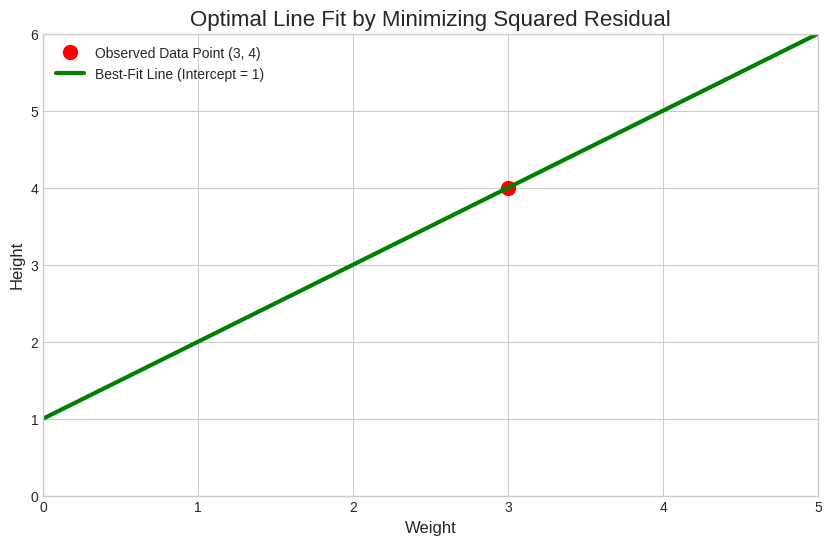

In [6]:
# Analytically solve for the best intercept
optimal_intercept = observed_height - observed_weight
print(f"The optimal intercept is: {optimal_intercept}")

# Plot the final result
plt.figure(figsize=(10, 6))

# Plot the observed data point
plt.plot(observed_weight, observed_height, 'ro', markersize=10, label='Observed Data Point (3, 4)')

# Plot the best-fit line
heights = predict_height(optimal_intercept, weights)
plt.plot(weights, heights, 'g-', lw=3, label=f'Best-Fit Line (Intercept = {optimal_intercept})')

plt.title('Optimal Line Fit by Minimizing Squared Residual', fontsize=16)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Height', fontsize=12)
plt.legend(fontsize=10)
plt.xlim(0, 5)
plt.ylim(0, 6)
plt.grid(True)
plt.show()

### Conclusion ✅

We have successfully used the principles of calculus, specifically the chain rule, to find the derivative of our loss function. By setting this derivative to zero, we found the exact intercept value that **minimizes the squared residual**, giving us the best possible fit for our simple model.